In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = os.path.abspath('../')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab'))
# print root_dir

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
#     ecm= 7000 * GeV,
    p1pdg=2212,
#     p2pdg=2212
#     nuc2_prop=(12,6)
    ecm=2760*GeV,
#     nuc1_prop=(208,82),
    nuc2_prop=(208,82)
)

In [4]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True

In [5]:
# Define the two models
# m1 = 'DPMJETIII306'
m1 = 'DPMJETIII171'
# m1 = 'QGSJETII04'
m2 = 'DPMJETIII171'

In [6]:
gen_m1 = make_generator_instance(interaction_model_by_tag[m1])
gen_m1.init_generator(event_kinematics)
# import IPython
# IPython.embed()
# gen_m2 = make_generator_instance(interaction_model_by_tag[m2])
# gen_m2.init_generator(event_kinematics)


impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III


In [ ]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])

m1_pions = np.zeros(n_bins)
m1_protons = np.zeros(n_bins)
m1_negpions = np.zeros(n_bins)

eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
widths_eta = (eta_bins[1:] - eta_bins[:-1])

m1_charged_eta = np.zeros(n_bins)

n_events = 20
norm = 1./float(n_events)

# This
for event in gen_m1.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m1_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
#     m1_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
#     m1_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]
#     m1_negpions += norm/widths*np.histogram(np.sqrt(pdata.mass(-211)**2 + event.pt2[(event.p_ids) == -211]),bins=bins)[0]

In [11]:
n_bins = 30

imparam_bins = np.linspace(0,15,n_bins+1)
imparam_grid = 0.5*(imparam_bins[1:] + imparam_bins[:-1])
widths_imparam = (imparam_bins[1:] - imparam_bins[:-1])

m1_imparam = np.zeros(n_bins)

nucmult_bins = np.linspace(0,80000,n_bins+1)
nucmult_grid = 0.5*(nucmult_bins[1:] + nucmult_bins[:-1])
widths_imparam = (nucmult_bins[1:] - nucmult_bins[:-1])

m1_nucmult = np.zeros(n_bins)

npart_bins = np.linspace(0, 20, n_bins+1)
npart_grid = 0.5*(npart_bins[1:] + npart_bins[:-1])
widths_npart = (npart_bins[1:] - npart_bins[:-1])

m1_npart = np.zeros(n_bins)
m1_npart_b = np.zeros(n_bins)

n_events = 1000
norm = 1./float(n_events)

# This
imparam_arr = []
mult_arr = []
for event in gen_m1.event_generator(event_kinematics, n_events):
#     event.filter_final_state_charged()
#     imparams = np.ones(np.count_nonzero(event.p_ids != 0))*float(event.impact_parameter)
#     mults = np.ones(np.count_nonzero(event.p_ids != 0))
    norm = 1./(2.*np.pi*float(event.impact_parameter))/float(n_events)
    if float(event.impact_parameter) < 3.:
        print event.impact_parameter, event.n_wounded, np.count_nonzero(event.p_ids != 0)
#     print imparams, len(imparams)
#     imparam_arr.append(imparams)
#     m1_imparam += norm/widths_imparam*np.histogram(imparams, bins=imparam_bins)[0]
#     print len(m1_imparam)
#     imparam_arr.append(float(event.impact_parameter))
#     mult_arr.append(np.count_nonzero(event.p_ids != 0))
#     print event.impact_parameter, np.count_nonzero(event.p_ids != 0)
#     m1_imparam += norm/widths*len(event.p_ids)
    
    m1_imparam += norm/widths_imparam*np.histogram(np.ones(np.count_nonzero(event.p_ids != 0))*float(event.impact_parameter), bins=imparam_bins)[0]
#     m1_npart += norm/widths_npart*np.histogram(np.ones(np.count_nonzero(event.p_ids != 0))*float(event.n_wounded), bins=npart_bins)[0]
    m1_npart_b += norm/widths_imparam*np.histogram(float(event.impact_parameter), bins=imparam_bins, weights=event.n_wounded)[0]
# print imparam_arr, mult_arr
# imparam_arr = np.concatenate([arr for arr in imparam_arr], axis=None)
# print imparam_arr, mult_arr
# norm = 1.
# m1_imparam = norm/widths_imparam*np.histogram(imparam_arr, bins=imparam_bins)[0]
print m1_imparam, m1_npart, m1_npart_b

2.0759091806515753 14 1622
2.3685892399937445 12 1372
2.8879814929459924 9 1246
2.614022113161991 14 1372
2.1649195828042607 15 1264
0.19315482077061563 8 1127
2.6638745348843758 9 1158
1.5047096045816306 18 1361
2.8795802322140793 17 1503
1.6454890604128931 6 855
1.1182957988779898 11 1086
1.7175359060810118 11 1208
1.8610008972373218 15 1598
1.3295749444246359 16 1497
0.630766278495779 15 1099
1.0981628793444143 18 1629
1.916341155732623 9 976
1.8881595728779355 14 1145
1.4954743627009464 18 1555
2.9943276133474845 10 1368
2.947983382748201 8 846
1.148067014549903 18 1490
2.077605909803479 13 1433
1.4480049044954815 11 1090
2.094566433309874 15 1462
2.1956194410090735 12 980
1.2507013601295807 12 1249
1.7862770684130438 25 1722
2.8902210111951447 10 1175
0.18502483315592883 15 1799
2.653939316011097 8 1163
1.4778045884926254 15 1375
2.646695260603674 19 1638
1.9154039075861315 16 1451
1.7121631658334047 15 1745
1.5198754915679564 15 1460
1.8343463206505641 15 1268
1.4241622946010413 

In [ ]:
m2_pions = np.zeros(n_bins)
m2_protons = np.zeros(n_bins)
m2_charged_eta = np.zeros(n_bins)
m2_imparam = np.zeros(n_bins)

for event in gen_m2.event_generator(event_kinematics, n_events):
#     event.filter_final_state_charged()
    m2_imparam += norm/widths*np.histogram(event.impact_parameter, bins=imparam_bins, weights=len(event.p_ids))[0]
#     m2_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
#     m2_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
#     m2_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

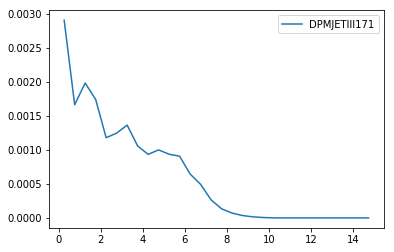

In [12]:
l=plt.plot(imparam_grid, m1_imparam, label=m1)[0]
# plt.plot(imparam_grid, m2_imparam, c=l.get_color(), ls='--', label=m2)
plt.legend()

In [ ]:
l=plt.plot(npart_grid, m1_npart, label=m1)[0]
# plt.plot(imparam_grid, m2_imparam, c=l.get_color(), ls='--', label=m2)
plt.legend()

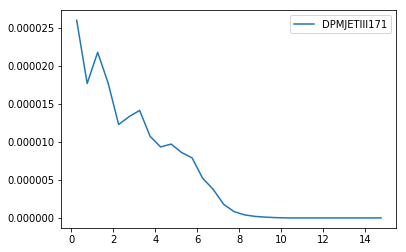

In [13]:
l=plt.plot(imparam_grid, m1_npart_b, label=m1)[0]
# plt.plot(imparam_grid, m2_imparam, c=l.get_color(), ls='--', label=m2)
plt.legend()

In [ ]:
l=plt.plot(grid, m1_protons,label=m1)[0]
plt.plot(grid, m2_protons,c=l.get_color(), ls='--',label=m2)
l=plt.plot(grid, m1_pions,label=m1)[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2)
plt.ylim(1e-2,)
plt.semilogy()
plt.legend()

In [ ]:
l=plt.plot(eta_grid, m1_charged_eta, label=m1)[0]
plt.plot(eta_grid, m2_charged_eta,c=l.get_color(), ls='--', label=m2)
plt.ylim(0,7)
plt.grid()
plt.legend()

In [ ]:
for event in gen_m1.event_generator(event_kinematics, 3):
    event.filter_final_state_charged()
    for pid, x, y, z, e in zip(event.p_ids, event.px, event.py, event.pz, event.en):
        print '{0:8}: {1:10.2e} {2:10.2e} {3:10.2e} {4:10.2e}'.format(pid, x, y, z, e) 

In [ ]:
gen_m2.lib.pomdls.iswmdl[5]